<a href="https://colab.research.google.com/github/HareeshwarKarthikeyan/Strong-Language-Hate-Speech-Filter/blob/Nirav-Agarwal/model_lstm_v1_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install nltk
import nltk
from nltk.corpus import stopwords

In [4]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_csv('/content/drive/My Drive/finalcleandataTraining.csv')
df.head()

,message,toxic,obscene,insult,racism,sexism
0,b'fuck you you red scumbag fuck you you red sc...,1,1,1,0,0
1,odeh is actions in the us proves that she is a...,0,0,0,1,0
2,b'clifton bristol the clifton ward also includ...,0,0,0,0,0
3,b' im not sexist but this is one seriously stu...,0,0,0,0,1
4,b'love a subtle menu sausage spatchcock tart p...,0,0,0,0,1


In [0]:
# Hyper-Parameters

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)



In [0]:
label = ['toxic','obscene','insult','racism','sexism']

In [0]:
message = 'message'

In [0]:
def get_list(data):
    data = data.fillna("unknown")
    return data.tolist()

In [0]:
def tokenize_reshape(data):
    data = tok.texts_to_matrix(data)
    return np.reshape(data, (data.shape[0], 1, data.shape[1]))

In [0]:
x_train = get_list(df[message])


In [0]:
tok = Tokenizer(num_words=1000)
tok.fit_on_texts(x_train)

In [0]:
x_train = tokenize_reshape(x_train)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
model.add(LSTM(200, return_sequences=True))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            960800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1206      
Total params: 1,282,806
Trainable params: 1,282,806
Non-trainable params: 0
_________________________________________________________________


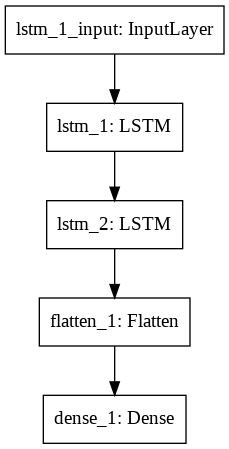

In [17]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
# for i, j in enumerate(label):
#     print("Train ",j)
#     y_train = df[j].values
#     model.fit(x_train, y_train, epochs=10)

In [0]:
# model1 = Sequential()
# model1.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
# model1.add(LSTM(200, return_sequences=True))
# model1.add(Flatten())
# model1.add(Dense(3, activation='softmax'))
# model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.layers import Input
from keras.models import Model
xdata = df['message']
y_label = df[["toxic", "obscene", "insult", "racism", "sexism"]]
ydata = y_label.values


from sklearn.model_selection import train_test_split

xtrain,xtest,y_train,ytest = train_test_split(xdata,ydata,test_size=0.2) 
maxlen = 64
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1

from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/Prj/glove.twitter.27B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:])
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector



In [72]:
from keras.layers.embeddings import Embedding
from keras.layers import Dropout


deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(32, return_sequences=True)(embedding_layer)
LSTM_Layer_2 = LSTM(32, return_sequences=True)(LSTM_Layer_1)
Dropout_Layer = Dropout(0.5)(LSTM_Layer_2)
#LSTM_Layer_3 = LSTM(128, return_sequences=True)(Dropout_Layer)
#LSTM_Layer_4 = LSTM(128, return_sequences=True)(LSTM_Layer_3)
LSTM_Layer_5 = LSTM(32)(Dropout_Layer)
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_5)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 64)                0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 64, 200)           7328200   
_________________________________________________________________
lstm_61 (LSTM)               (None, 64, 32)            29824     
_________________________________________________________________
lstm_62 (LSTM)               (None, 64, 32)            8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 32)            0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165

In [0]:
# for i, j in enumerate(label):
#     print("Train ",j)
#     y_train = df[j].values
#     model1.fit(x_train, y_train, epochs=2)
# df.head

In [75]:
# for i, j in enumerate(label):
#     # print("Train ",j)
df.head()
X_train = tokenizer.texts_to_sequences(xtrain)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.2)

Train on 8988 samples, validate on 2248 samples
Epoch 1/20
8988/8988 [==============================] - 21s 2ms/step - loss: 0.5699 - acc: 0.7982 - val_loss: 0.4692 - val_acc: 0.8169
Epoch 2/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.4694 - acc: 0.8145 - val_loss: 0.4639 - val_acc: 0.8169
Epoch 3/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.4624 - acc: 0.8145 - val_loss: 0.4461 - val_acc: 0.8169
Epoch 4/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.4357 - acc: 0.8145 - val_loss: 0.4065 - val_acc: 0.8169
Epoch 5/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.3844 - acc: 0.8208 - val_loss: 0.3350 - val_acc: 0.8529
Epoch 6/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.3167 - acc: 0.8629 - val_loss: 0.2842 - val_acc: 0.8809
Epoch 7/20
8988/8988 [==============================] - 13s 1ms/step - loss: 0.2645 - acc: 0.8983 - val_loss: 0.2427 - val_acc: 0.9035
Epoch 8

In [93]:
# Time to test
# Fingers crossed
X_test = tokenizer.texts_to_sequences(xtest)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_test)
print(model.metrics_names)
model.evaluate(X_test,ytest, batch_size=128)


[[ 668 1572 1641 ... 1470    8  668]
 [1026   11    1 ...    0    0    0]
 [ 266   21  319 ...    0    0    0]
 ...
 [1724 5208  928 ...    0    0    0]
 [9700   44  778 ...    0    0    0]
 [   9    5  719 ...    0    0    0]]
['loss', 'acc']
2810/2810 [==============================] - 3s 962us/step


[0.2200897848690956, 0.914092531916934]

In [104]:
test_data = pd.read_csv('/content/test22.csv')
print(test_data)
xtestdata = tokenizer.texts_to_sequences(test_data['message'])
xtestdata = pad_sequences(xtestdata, padding='post', maxlen=maxlen)
print(xtestdata)

                                             message  toxic  ...  racism  sexism
0  b'fuck you you red scumbag fuck you you red sc...      1  ...       0       0
1  odeh is actions in the us proves that she is a...      0  ...       1       0
2  b'clifton bristol the clifton ward also includ...      0  ...       0       0
3  b' im not sexist but this is one seriously stu...      0  ...       0       1
4  b'love a subtle menu sausage spatchcock tart p...      0  ...       0       1

[5 rows x 6 columns]
[[ 406    2    2  965 3178   21    2    2  965 3852    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   4 1027   11    1  173 2030   10  151    4    5 1081 1976    7   37
  6169 2660   39   33  833   11    0    0    0    0    0    0    0    0
     0    0    0 

In [105]:
print(model.predict(xtestdata))

[[0.9655293  0.9280647  0.81217456 0.01209453 0.02126294]
 [0.05491185 0.0116969  0.00819385 0.55068177 0.04257163]
 [0.01926923 0.00867283 0.00547776 0.00718278 0.00238201]
 [0.01299241 0.00417048 0.01187754 0.01767638 0.97108454]
 [0.01268855 0.00403506 0.01152331 0.01817462 0.971447  ]]


In [0]:
model.save('model_v1.0.3.h5')